<a href="https://colab.research.google.com/github/wallinsonsilva/ciencia_de_dados_covid/blob/master/ExtracaoDadosHist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm


In [ ]:
hist = pd.read_excel("/content/drive/My Drive/Projeto Ciencia de dados - COVID 19/OpenSus/HIST_PAINEL_COVIDBR_13ago2020.xlsx",decimal=",")
hist.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125,2,1,0,0,NaN,NaN,NaN


In [ ]:
hist.shape

(784028, 17)

In [ ]:
hist = hist.query('estado == "RN"')
hist.shape

(23691, 17)

In [ ]:
hist.isnull().sum()

regiao                        0
estado                        0
municipio                   311
coduf                         0
codmun                      171
codRegiaoSaude              311
nomeRegiaoSaude             311
data                          0
semanaEpi                     0
populacaoTCU2019            140
casosAcumulado                0
casosNovos                    0
obitosAcumulado               0
obitosNovos                   0
Recuperadosnovos          23691
emAcompanhamentoNovos     23691
interior/metropolitana      311
dtype: int64

In [79]:
dados = hist[['estado','municipio','coduf','codmun','codRegiaoSaude','nomeRegiaoSaude','populacaoTCU2019','casosAcumulado','casosNovos','obitosNovos']]
print(dados.shape)
dados.isnull().sum()

(23691, 10)


estado                0
municipio           311
coduf                 0
codmun              171
codRegiaoSaude      311
nomeRegiaoSaude     311
populacaoTCU2019    140
casosAcumulado        0
casosNovos            0
obitosNovos           0
dtype: int64

In [80]:
dados = dados.dropna()
print(dados.shape)
dados.isnull().sum()

(23380, 10)


estado              0
municipio           0
coduf               0
codmun              0
codRegiaoSaude      0
nomeRegiaoSaude     0
populacaoTCU2019    0
casosAcumulado      0
casosNovos          0
obitosNovos         0
dtype: int64

In [81]:
dados.head(-1)

,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,populacaoTCU2019,casosAcumulado,casosNovos,obitosNovos
155988,RN,Acari,24,240010.0,24004.0,4ª REGIAO DE SAUDE - CAICO,11136,0,0,0
155989,RN,Acari,24,240010.0,24004.0,4ª REGIAO DE SAUDE - CAICO,11136,0,0,0
155990,RN,Acari,24,240010.0,24004.0,4ª REGIAO DE SAUDE - CAICO,11136,0,0,0
155991,RN,Acari,24,240010.0,24004.0,4ª REGIAO DE SAUDE - CAICO,11136,0,0,0
155992,RN,Acari,24,240010.0,24004.0,4ª REGIAO DE SAUDE - CAICO,11136,0,0,0
...,...,...,...,...,...,...,...,...,...,...
179362,RN,Vila Flor,24,241500.0,24001.0,1ª REGIAO DE SAUDE - SAO JOSE DE MIPIBU,3170,82,0,0
179363,RN,Vila Flor,24,241500.0,24001.0,1ª REGIAO DE SAUDE - SAO JOSE DE MIPIBU,3170,82,0,0
179364,RN,Vila Flor,24,241500.0,24001.0,1ª REGIAO DE SAUDE - SAO JOSE DE MIPIBU,3170,82,0,0
179365,RN,Vila Flor,24,241500.0,24001.0,1ª REGIAO DE SAUDE - SAO JOSE DE MIPIBU,3170,82,0,0


In [82]:
#Limpa os valores no formato 102.400(7)
dados['populacaoTCU2019'] = dados['populacaoTCU2019'].str.replace('\(.*\)','').str.replace('.','')

In [83]:
dados.codmun = dados.codmun.astype(str)
dados.populacaoTCU2019 = dados.populacaoTCU2019.astype('int64')
dados.codmun = dados.codmun.astype('float').astype('int64').astype(str)
dados.codRegiaoSaude = dados.codRegiaoSaude.astype('float').astype('int64').astype(str)
#Dados contem todo o histórico da evolução dos casos nos municípios do RN
dados.head(-1)
dados.to_csv('/content/drive/My Drive/Projeto Ciencia de dados - COVID 19/Dados Gerados/ET_HIST_RN.csv',index=False)

In [84]:
dados

,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,populacaoTCU2019,casosAcumulado,casosNovos,obitosNovos
155988,RN,Acari,24,240010,24004,4ª REGIAO DE SAUDE - CAICO,11136,0,0,0
155989,RN,Acari,24,240010,24004,4ª REGIAO DE SAUDE - CAICO,11136,0,0,0
155990,RN,Acari,24,240010,24004,4ª REGIAO DE SAUDE - CAICO,11136,0,0,0
155991,RN,Acari,24,240010,24004,4ª REGIAO DE SAUDE - CAICO,11136,0,0,0
155992,RN,Acari,24,240010,24004,4ª REGIAO DE SAUDE - CAICO,11136,0,0,0
...,...,...,...,...,...,...,...,...,...,...
179363,RN,Vila Flor,24,241500,24001,1ª REGIAO DE SAUDE - SAO JOSE DE MIPIBU,3170,82,0,0
179364,RN,Vila Flor,24,241500,24001,1ª REGIAO DE SAUDE - SAO JOSE DE MIPIBU,3170,82,0,0
179365,RN,Vila Flor,24,241500,24001,1ª REGIAO DE SAUDE - SAO JOSE DE MIPIBU,3170,82,0,0
179366,RN,Vila Flor,24,241500,24001,1ª REGIAO DE SAUDE - SAO JOSE DE MIPIBU,3170,86,4,0


In [95]:
type(dados)
casos_municipio = pd.pivot_table(dados, index=['codmun','municipio','codRegiaoSaude','nomeRegiaoSaude','populacaoTCU2019'],values=['casosNovos','obitosNovos'],aggfunc=np.sum)
casos_municipio = casos_municipio.reset_index()
casos_municipio = pd.DataFrame(casos_municipio)
#Dados contendo os casos acumulados de cada municipio do RN
casos_municipio

,codmun,municipio,codRegiaoSaude,nomeRegiaoSaude,populacaoTCU2019,casosNovos,obitosNovos
0,240010,Acari,24004,4ª REGIAO DE SAUDE - CAICO,11136,61,3
1,240020,Açu,24008,8ª REGIAO DE SAUDE - ACU,58017,1167,51
2,240030,Afonso Bezerra,24003,3ª REGIAO DE SAUDE - JOAO CAMARA,11035,101,6
3,240040,Água Nova,24006,6ª REGIAO DE SAUDE - PAU DOS FERROS,3252,20,0
4,240050,Alexandria,24006,6ª REGIAO DE SAUDE - PAU DOS FERROS,13577,44,4
...,...,...,...,...,...,...,...
162,241470,Várzea,24001,1ª REGIAO DE SAUDE - SAO JOSE DE MIPIBU,5500,81,5
163,241475,Venha-Ver,24006,6ª REGIAO DE SAUDE - PAU DOS FERROS,4177,8,3
164,241480,Vera Cruz,24001,1ª REGIAO DE SAUDE - SAO JOSE DE MIPIBU,12481,119,6
165,241490,Viçosa,24006,6ª REGIAO DE SAUDE - PAU DOS FERROS,1718,9,0


In [96]:
casos_municipio.rename(columns={'obitosNovos': 'obitosAcumulado'}, inplace = True)
casos_municipio.rename(columns={'casosNovos': 'casosAcumulado'}, inplace = True)
casos_municipio

,codmun,municipio,codRegiaoSaude,nomeRegiaoSaude,populacaoTCU2019,casosAcumulado,obitosAcumulado
0,240010,Acari,24004,4ª REGIAO DE SAUDE - CAICO,11136,61,3
1,240020,Açu,24008,8ª REGIAO DE SAUDE - ACU,58017,1167,51
2,240030,Afonso Bezerra,24003,3ª REGIAO DE SAUDE - JOAO CAMARA,11035,101,6
3,240040,Água Nova,24006,6ª REGIAO DE SAUDE - PAU DOS FERROS,3252,20,0
4,240050,Alexandria,24006,6ª REGIAO DE SAUDE - PAU DOS FERROS,13577,44,4
...,...,...,...,...,...,...,...
162,241470,Várzea,24001,1ª REGIAO DE SAUDE - SAO JOSE DE MIPIBU,5500,81,5
163,241475,Venha-Ver,24006,6ª REGIAO DE SAUDE - PAU DOS FERROS,4177,8,3
164,241480,Vera Cruz,24001,1ª REGIAO DE SAUDE - SAO JOSE DE MIPIBU,12481,119,6
165,241490,Viçosa,24006,6ª REGIAO DE SAUDE - PAU DOS FERROS,1718,9,0


In [98]:
casos_municipio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   codmun            167 non-null    object
 1   municipio         167 non-null    object
 2   codRegiaoSaude    167 non-null    object
 3   nomeRegiaoSaude   167 non-null    object
 4   populacaoTCU2019  167 non-null    int64 
 5   casosAcumulado    167 non-null    int64 
 6   obitosAcumulado   167 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 9.3+ KB


In [99]:
quantidade_casos = casos_municipio['casosAcumulado'].sum()
porcentagem_casos = casos_municipio['casosAcumulado'] / casos_municipio['populacaoTCU2019']
casos_municipio['porcentagem_casos_hab'] = porcentagem_casos
casos_municipio['porcentagem_obitos_casos'] = casos_municipio['obitosAcumulado'] / casos_municipio['casosAcumulado']
casos_municipio.to_csv('/content/drive/My Drive/Projeto Ciencia de dados - COVID 19/Dados Gerados/ET_CASOS_ACUMULADO_RN.csv',index=False)
casos_municipio

,codmun,municipio,codRegiaoSaude,nomeRegiaoSaude,populacaoTCU2019,casosAcumulado,obitosAcumulado,porcentagem_casos_hab,porcentagem_obitos_casos
0,240010,Acari,24004,4ª REGIAO DE SAUDE - CAICO,11136,61,3,0.005478,0.049180
1,240020,Açu,24008,8ª REGIAO DE SAUDE - ACU,58017,1167,51,0.020115,0.043702
2,240030,Afonso Bezerra,24003,3ª REGIAO DE SAUDE - JOAO CAMARA,11035,101,6,0.009153,0.059406
3,240040,Água Nova,24006,6ª REGIAO DE SAUDE - PAU DOS FERROS,3252,20,0,0.006150,0.000000
4,240050,Alexandria,24006,6ª REGIAO DE SAUDE - PAU DOS FERROS,13577,44,4,0.003241,0.090909
...,...,...,...,...,...,...,...,...,...
162,241470,Várzea,24001,1ª REGIAO DE SAUDE - SAO JOSE DE MIPIBU,5500,81,5,0.014727,0.061728
163,241475,Venha-Ver,24006,6ª REGIAO DE SAUDE - PAU DOS FERROS,4177,8,3,0.001915,0.375000
164,241480,Vera Cruz,24001,1ª REGIAO DE SAUDE - SAO JOSE DE MIPIBU,12481,119,6,0.009534,0.050420
165,241490,Viçosa,24006,6ª REGIAO DE SAUDE - PAU DOS FERROS,1718,9,0,0.005239,0.000000


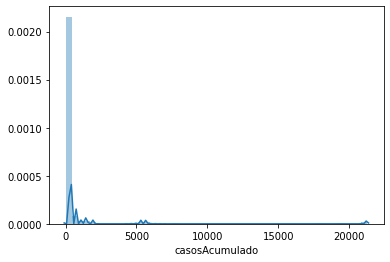

In [100]:
sns.distplot(casos_municipio["casosAcumulado"])

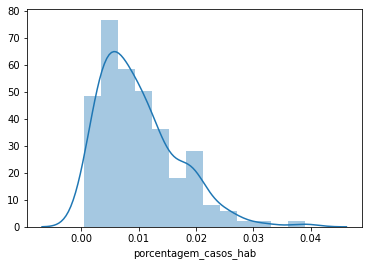

In [ ]:
sns.distplot(casos_municipio["porcentagem_casos_hab"])

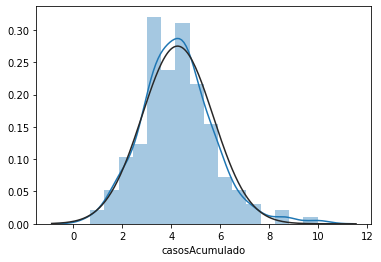

In [ ]:
casos_log = np.log(casos_municipio["casosAcumulado"])
sns.distplot(casos_log,fit=norm)

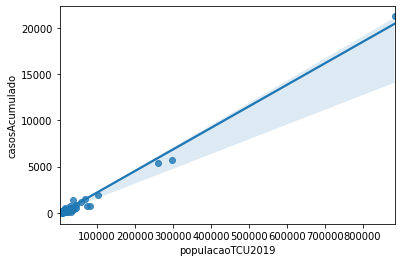

In [ ]:
populacao_casoacumulado = casos_municipio.loc[:,['populacaoTCU2019','casosAcumulado']]
sns.regplot(x="populacaoTCU2019", y="casosAcumulado", data=populacao_casoacumulado)
plt.show()

In [ ]:
populacao_casoacumulado.corr()

,populacaoTCU2019,casosAcumulado
populacaoTCU2019,1.000000,0.993275
casosAcumulado,0.993275,1.000000


In [ ]:
populacao_casoacumulado.cov()

,populacaoTCU2019,casosAcumulado
populacaoTCU2019,5.576790e+09,1.298985e+08
casosAcumulado,1.298985e+08,3.066795e+06


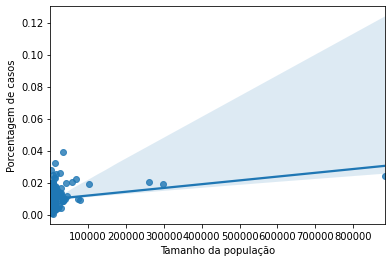

In [ ]:
populacao_casoacumulado = casos_municipio.loc[:,['populacaoTCU2019','porcentagem_casos_hab']]
sns.regplot(x="populacaoTCU2019", y="porcentagem_casos_hab", data=populacao_casoacumulado)
plt.xlabel('Tamanho da população')
plt.ylabel('Porcentagem de casos')
plt.show()